# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БВТ2005 Захаров Максим Юрьевич
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import copy
from timeit import default_timer

In [2]:
def read_graph(filename): #cчитывание графа из файла
    adj_matrix = list()
    graphfile = open(filename, 'r')
    for l in graphfile:
        l = l.split()
        for i in range(len(l)):
            l[i] = int(l[i])
        adj_matrix.append(l)
    graphfile.close()
    return adj_matrix

def draw_graph(adj_matrix, path):
    graph = nx.DiGraph(np.matrix(adj_matrix))
    colors=[]
    for item in graph.edges():
        catch = 0
        for i in range(len(path)-1):
            if path[i] == item[0] and path[i+1] == item[1]:
                catch+=1
                break
        if catch == 1:
            colors.append('red')
        else:
            colors.append('black')
    pos = nx.circular_layout(graph)  # positions for all nodes
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_nodes(graph, pos, node_size=250, node_color = 'royalblue')
    nx.draw_networkx_edges(graph, pos, edge_color=colors, arrows=True, arrowsize = 10, width = 2)
    nx.draw_networkx_labels(graph, pos, font_size=13, font_weight = 'bold', font_family='sans-serif')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels = labels, font_size=11, font_family='sans-serif')
    plt.axis('off')
    plt.show()
    
def convert_adj_matrix(adj_matrix):
    res = []
    for i in range(len(adj_matrix)):
        res.append([])
        for j in range(len(adj_matrix)):
            res[i].append(adj_matrix[i][j])
            if adj_matrix[i][j] == 0 and i!=j:
                res[i][j] = math.inf
    return res

# Исходная таблица смежности графа в файле

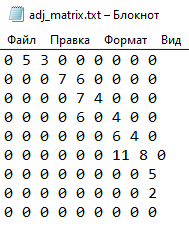

# Алгоритм Флойда-Уоршелла

Начальная вершина:0
Конечная врешина:8
Длина пути: 16


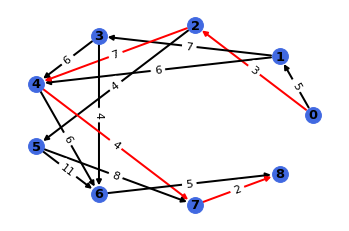

In [3]:
def floyd_warshall_get_path(P, start, end):
    res = [start]
    while start != end:
        start = P[start][end]
        res.append(start)
    return res

def floyd_warshall(adj_matrix, start, end):

    N = len(adj_matrix)                       # число вершин в графе
    P = [[v for v in range(N)] for u in range(N)]  # начальный список предыдущих вершин для поиска кратчайших маршрутов

    for k in range(N):
        for i in range(N):
            for j in range(N):
                if adj_matrix[i][k] < math.inf and adj_matrix[k][j] < math.inf and adj_matrix[i][j] > adj_matrix[i][k] + adj_matrix[k][j]:
                    adj_matrix[i][j] = adj_matrix[i][k] + adj_matrix[k][j]
                    P[i][j] = P[i][k]     # номер промежуточной вершины при движении от i к j
    
    path = floyd_warshall_get_path(P,start,end)
    if len(path) == 2 and adj_matrix[start][end] == math.inf:
        return [], 0
    return path, adj_matrix[start][end]
adj_matrix = read_graph('E://Работы/Сиаод/lab6/adj_matrix.txt')
mat1 = convert_adj_matrix(adj_matrix)
start = int(input('Начальная вершина:'))
end = int(input('Конечная врешина:'))
t1 = default_timer()
path, dist = floyd_warshall(mat1, start, end)
floyd_warshall_time = default_timer() - t1
if path and dist:
    print(f"Длина пути: {dist}")
    draw_graph(adj_matrix,path)
else:
    print(f"Путь из {start} в {end} не существует")
    draw_graph(adj_matrix,[])

# Алгоритм Дейкстры

Начальная вершина: 0
Конечная врешина: 8
Длина пути: 16


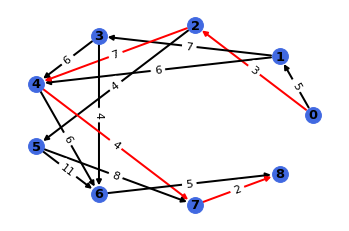

In [4]:
def dijkstra(adj_matrix, start):
    dist = [math.inf for item in adj_matrix] # последняя строка таблицы Дейкстры
    dist[start] = 0 #начинаем со стартового узла (для него длина пути 0 соотвественно)
    next_node = start #следующий узел для работы (с минимальной длиной пути)
    paths = [[start] for item in adj_matrix]
    next_dist = dist.copy()
    for k in range(len(dist)):
        for i in range(len(dist)):
            if adj_matrix[next_node][i] != math.inf and dist[next_node] != math.inf and dist[i] > adj_matrix[next_node][i] + dist[next_node]:
                dist[i] = adj_matrix[next_node][i] + dist[next_node]
                next_dist[i] = dist[i]
                paths[i] = paths[next_node].copy()
                paths[i].append(i) #обновляем путь до узла
        next_dist[next_node] = math.inf
        next_node = min(range(len(next_dist)), key = next_dist.__getitem__) #выбираем следующий минимальный узел среди оставшихся
    if len(paths[end]) == 1:
        return [],0
    return paths, dist
adj_matrix = read_graph('E://Работы/Сиаод/lab6/adj_matrix.txt')
mat1 = convert_adj_matrix(adj_matrix)
start = int(input('Начальная вершина: '))
end = int(input('Конечная врешина: '))
t1 = default_timer()
paths, dist = dijkstra(mat1, start)
dijkstra_time = default_timer() - t1
if paths and dist:
    print(f"Длина пути: {dist[end]}")
    draw_graph(adj_matrix,paths[end])
else:
    print(f"Путь из {start} в {end} не существует")
    draw_graph(adj_matrix,[])

# Алгоритм Беллмана-Форда

Начальная вершина: 0
Конечная врешина: 8
Длина пути: 16


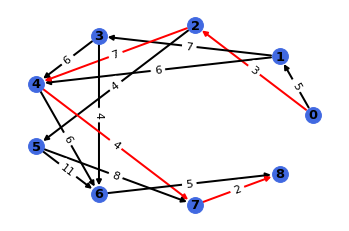

In [5]:
def bellman_ford(adj_matrix, start):
    path_lengths = [math.inf for item in adj_matrix]
    path_lengths[start] = 0
    paths = [[start] for item in adj_matrix]
    for i in range(len(adj_matrix)):
        for u in range(len(adj_matrix)):
             for v in range(len(adj_matrix)):
                    if path_lengths[u] != math.inf and adj_matrix[u][v] != math.inf and path_lengths[v] > path_lengths[u] + adj_matrix[u][v]:
                        path_lengths[v] = path_lengths[u] + adj_matrix[u][v]
                        paths[v] = paths[u].copy()
                        paths[v].append(v)
    if len(paths[end]) == 1:
        return [],0
    return paths, path_lengths
adj_matrix = read_graph('E://Работы/Сиаод/lab6/adj_matrix.txt')
mat1 = convert_adj_matrix(adj_matrix)
start = int(input('Начальная вершина: '))
end = int(input('Конечная врешина: '))
t1 = default_timer()
path, dist = bellman_ford(mat1, start)
bellman_ford_time = default_timer() - t1
if path and dist:
    print(f"Длина пути: {dist[end]}")
    draw_graph(adj_matrix,path[end])
else:
    print(f"Путь из {start} в {end} не существует")
    draw_graph(adj_matrix,[])

# Алгоритм Джонсона

Начальная вершина: 0
Конечная врешина: 8
Длина пути: 16


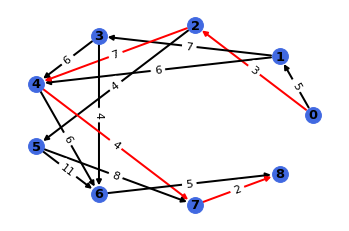

In [6]:
def johnson(adj_matrix, start, end):
    adj_matrix = convert_adj_matrix(adj_matrix)
    adjmat_new = adj_matrix.copy() #создаем матрицу смежности с новой вершиной
    for item in adjmat_new:
        item.append(math.inf) #прежние вершины не имеют пути до новой
    adjmat_new.append([])
    for i in range(len(adjmat_new)):
        adjmat_new[-1].append(0) # длина ребер от новой вершины до старых равняется нулю
    paths, bell_dist = bellman_ford(adjmat_new, len(adjmat_new)-1) #применяем алогритм Беллмана_форда для обновленного графа
    for u in range(len(adj_matrix)):
        for v in range(len(adj_matrix)):
            if adj_matrix[u][v] != math.inf and bell_dist[u] != math.inf and bell_dist[v] != math.inf:
                adj_matrix[u][v] += bell_dist[u] - bell_dist[v] #изменяем значения рёбер по формуле
    final_dist = []
    final_paths = []
    for i in range(len(adj_matrix)-1): #применяем алгоритм Дейкстры для графа с обновленными весами рёбер
            path, dist = dijkstra(adj_matrix, i)
            final_dist.append(dist)
            final_paths.append(path)
    final_dist.append([])
    final_paths.append([])
    for i in range(len(adj_matrix)):
        final_paths[-1].append([end])
        if i==len(adj_matrix)-1:
            final_dist[-1].append(start)
        else:
            final_dist[-1].append(math.inf)
    if len(final_paths[start][end]) == 1:
        return [], 0
    return final_paths, final_dist

adj_matrix = read_graph('E://Работы/Сиаод/lab6/adj_matrix.txt')
start = int(input('Начальная вершина: '))
end = int(input('Конечная врешина: '))
t1 = default_timer()
path, dist = johnson(adj_matrix, start, end)
johnson_time = default_timer() - t1
if path and dist:
    print(f"Длина пути: {dist[start][end]}")
    draw_graph(adj_matrix,path[start][end])
else:
    print(f"Путь из {start} в {end} не существует")
    draw_graph(adj_matrix,[])

# Алгоритм Левита

Начальная вершина: 0
Конечная врешина: 8
Длина пути: 16


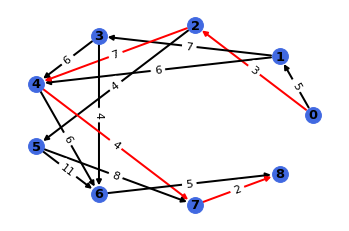

In [7]:
def levit(adj_matrix, start, end):
    adj_matrix = convert_adj_matrix(adj_matrix)
    M0 = set() #множество вершин, расстояния до которых уже вычислены (возможно неокончательно)
    M1 = {'main': [start], 'urgent': []} #вершины, расстояния до которых вычисляются
    M2 = set(range(1, len(adj_matrix)+1)) #вершины, расстояния до которых ещё не вычислены
    dist = [math.inf for item in adj_matrix]
    dist[start] = 0
    paths = [[start] for item in adj_matrix]
    while len(M1['main']) or len(M1['urgent']):
        if len(M1['urgent']):
            u = M1['urgent'].pop(0)
        else:
            u = M1['main'].pop(0)
        for v in range(len(adj_matrix)):
            if dist[u] == math.inf or adj_matrix[u][v] == math.inf:
                continue
            if v in M2:
                M2.remove(v)
                M1['main'].append(v)
                if dist[v] > dist[u] + adj_matrix[u][v]:
                    paths[v] = paths[u].copy()
                    paths[v].append(v)
                    dist[v] = dist[u] + adj_matrix[u][v]
            elif v in M1['main'] or v in M1['urgent']:
                if dist[v] > dist[u] + adj_matrix[u][v]:
                    paths[v] = paths[u].copy()
                    paths[v].append(v)
                    dist[v] = dist[u] + adj_matrix[u][v]
            elif v in M0 and dist[v] > dist[u] + adj_matrix[u][v]:
                M0.remove(v)
                M1['urgent'].append(v)
                dist[v] = dist[u] + adj_matrix[u][v]
                paths[v] = paths[u].copy()
                paths[v].append(v)
        M0.add(u)
    if len(paths[end]) == 1:
             return [], 0
    return paths, dist

adj_matrix = read_graph('E://Работы/Сиаод/lab6/adj_matrix.txt')
start = int(input('Начальная вершина: '))
end = int(input('Конечная врешина: '))
t1 = default_timer()
paths, dist = levit(adj_matrix, start, end)
levit_time = default_timer() - t1
if paths and dist:
    print(f"Длина пути: {dist[end]}")
    draw_graph(adj_matrix,paths[end])
else:
    print(f"Путь из {start} в {end} не существует")
    draw_graph(adj_matrix,[])

# Алгоритм Йена

Начальная вершина: 0
Конечная врешина: 8
Количество искомых путей: 6
Длина пути: 16


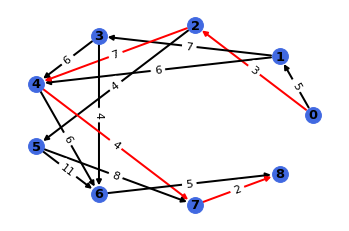

Длина пути: 17


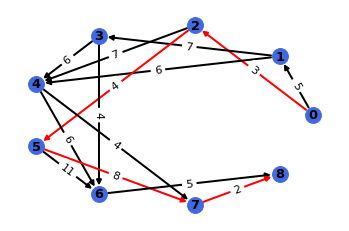

Длина пути: 17


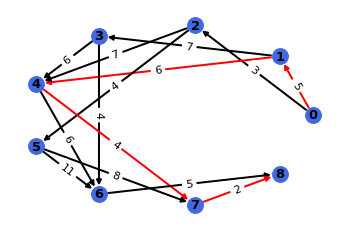

Длина пути: 21


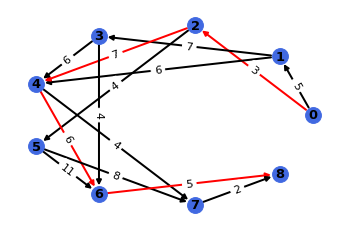

Длина пути: 21


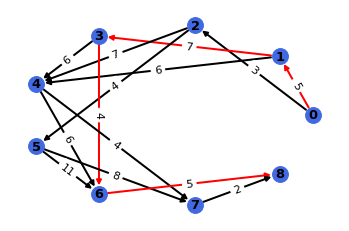

Длина пути: 22


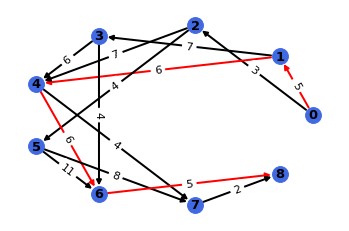

In [8]:
def yen(adj_matrix, start, end, K):
    original_mat = adj_matrix.copy()
    adj_matrix = convert_adj_matrix(adj_matrix)
    candidates = set()
    original_paths, original_dists = levit(adj_matrix, start, end)
    paths = [original_paths[end]]
    lengths = [original_dists[end]]
    for k in range(K):
        cur_mat = adj_matrix.copy() # создаем копию исходной матрицы, т.к. по ходу выполнения будем менять графы
        for i in range(len(paths[-1])-1):
            #постепенно выбираем корневой путь и вершину ветвления
            spur_node = paths[-1][i]
            root_path = paths[-1][:i+1]
            for j in range(len(root_path)): #удаляем из графа вершины, идущие в пути перед вершиной ветвления (к ним мы не можем возвращаться)
                if root_path[j] != spur_node:
                    cur_mat[root_path[j]] = [math.inf for l in range(len(cur_mat))]
            for path in paths: #в списке path находим пути, которые начинаются с корневого пути
                if root_path == path[:i+1]:
                    cur_mat[path[i]][path[i+1]] = math.inf #удаляем следующие ребра в найденных путях, чтоб начать минимальное ветвление
            original_paths, original_dists = levit(cur_mat, spur_node, end) # находим кратчайший путь в изменёном графе
            if len(original_paths):
                total_dist = 0
                spur_path = original_paths[end][1:] #определяем путь ветвления без начальной вершины в найденном пути, т.к. она есть в корневом пути
                total_path = root_path
                total_path.extend(spur_path)
                total_path = tuple(total_path) #преобразовываем список в кортеж, чтобы добавить его в набор кандидатов
                for j in range(len(total_path)-1):
                    total_dist += original_mat[total_path[j]][total_path[j+1]]
                candidates.add((total_path, total_dist))
        if not candidates:
            break
        sorted_candidates = list(candidates) # преобразовавыем набор кандидатов в список чтобы остортировать его по длинам маршртуа
        sorted_candidates.sort(key = lambda x: x[1])
        paths.append(list(sorted_candidates[0][0])) #добавляем в список paths минимальный путь
        lengths.append(sorted_candidates[0][1])
        candidates.remove(sorted_candidates[0]) # удаляем минимальный путь из набора кандидатов
    return paths, lengths
adj_matrix = read_graph('E://Работы/Сиаод/lab6/adj_matrix.txt')
start = int(input('Начальная вершина: '))
end = int(input('Конечная врешина: '))
K = int(input('Количество искомых путей: '))
t1 = default_timer()
paths, dists = yen(adj_matrix, start, end, K)
yen_time = default_timer() - t1
for i in range(K):
    print(f"Длина пути: {dists[i]}")
    draw_graph(adj_matrix,paths[i])

# Вывод

In [9]:
time_list=[[floyd_warshall_time, "Алгоритм Флойда-Уоршелла"],
          [dijkstra_time, "Алгоритм Дейкстры"],
          [bellman_ford_time, "Алгоритм Беллмана-Форда"],
          [johnson_time, "Алгоритм Джонсона"],
          [levit_time, "Алгоритм Левита"],
          [yen_time, "Алгоритм Йена"]]
time_list.sort()
for i in range(len(time_list)):
    print(f"{i + 1} место: {time_list[i][1]} - {time_list[i][0]}")

1 место: Алгоритм Дейкстры - 0.00031540000000163104
2 место: Алгоритм Левита - 0.00035970000000062896
3 место: Алгоритм Флойда-Уоршелла - 0.0007274000000005998
4 место: Алгоритм Беллмана-Форда - 0.000811900000002197
5 место: Алгоритм Джонсона - 0.001853900000000408
6 место: Алгоритм Йена - 0.003199800000000863
